# Coinbase Retriever

💡 Info

1. https://algotrading101.com/learn/coinbase-api-guide/
2. https://github.com/KmiQ/coinbase-advanced-python
3. https://docs.cloud.coinbase.com/advanced-trade-api/docs/welcome
4. https://docs.cloud.coinbase.com/advanced-trade-api/reference/retailbrokerageapi_getproducts


https://finviz.com

In [1]:
from dotenv import load_dotenv
from coinbase import CoinbaseClient
from coinbaseadvanced.client import Granularity
from datetime import datetime

# Since .env is in root folder
load_dotenv('../.env')

True

### Create the Client

In [2]:
client = CoinbaseClient(api_key='CB_API_KEY_NAME',secret_key='CB_PRIVATE_KEY')

### List the Available Products

In [ ]:
products = client.list_products()

products

### List the Product Candles

<Axes: xlabel='Date'>

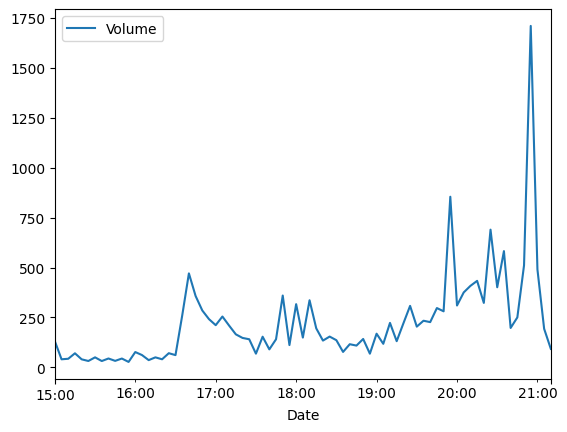

In [21]:
df = client.get_product_candles(
  product_id='BTC-USD',
  start_date=datetime.fromisoformat('2024-01-18T16:00:00'),
  end_date=datetime.fromisoformat('2024-01-18T23:00:00'),
  granularity=Granularity.FIVE_MINUTE)

df.plot(y=['Volume'])

### Get last Market Trades

In [ ]:
df = client.get_market_trades(product_id='BTC-USD', limit=100)

df

### Get Product Book

In [10]:
df = client.get_product_book(product_id='BTC-USD',limit=100)

#df

,Type,Price,Size
0,Bid,40918.40,0.007252
1,Bid,40917.99,0.427000
2,Bid,40917.08,0.012177
3,Bid,40915.21,0.268506
4,Bid,40914.40,0.122206
...,...,...,...
195,Ask,40967.27,2.502528
196,Ask,40968.52,0.161833
197,Ask,40968.89,0.008903
198,Ask,40969.16,0.020466


### Plot the Bid vs Ask Spread

<Axes: xlabel='Type'>

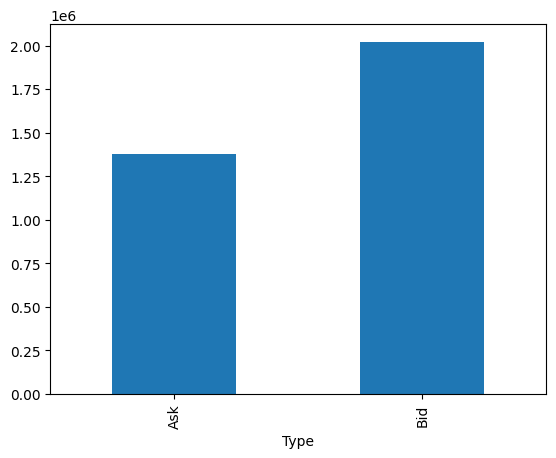

In [18]:
df['Total'] = df['Size'] * df['Price']

df.groupby('Type')['Total'].sum().plot(kind='bar')

### List the Best Bind/Asks (for one or many/all products)

In [22]:
df = client.get_best_bid_ask() # All products

df

AttributeError: 'CoinbaseClient' object has no attribute 'get_best_bid_ask'